In [1]:
import pandas as pd

# Read the data into a DataFrame
df = pd.read_csv("data_chicago.csv")

C:\Users\Yash\AppData\Local\Temp\ipykernel_8944\3327223568.py:4: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_chicago.csv")


In [2]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
df1= df['Date'].str.split(expand=True)
df1[0] = pd.to_datetime(df1[0], format='%m/%d/%Y')
df1[1] = pd.to_datetime(df1[1], format='%H:%M:%S')
df1['Month'] = df1[0].dt.month
df1['Day'] = df1[0].dt.day
df1['Hour'] = df1[1].dt.hour
df.insert(1,'Hour',df1['Hour'])
df.insert(1,'Day',df1['Day'])
df.insert(1,'Month',df1['Month'])

In [4]:
df1.head()

,0,1,2,Month,Day,Hour
0,2015-03-18,1900-01-01 12:00:00,PM,3.0,18.0,12.0
1,2018-12-20,1900-01-01 03:00:00,PM,12.0,20.0,3.0
2,2016-05-01,1900-01-01 12:25:00,AM,5.0,1.0,12.0
3,2018-12-20,1900-01-01 04:00:00,PM,12.0,20.0,4.0
4,2014-06-01,1900-01-01 12:01:00,AM,6.0,1.0,12.0


In [5]:
df.drop('ID',inplace=True,axis=1)
df.drop('Case Number',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114931 entries, 0 to 1114930
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Month                 1114926 non-null  float64
 1   Day                   1114926 non-null  float64
 2   Hour                  1114926 non-null  float64
 3   Block                 1114926 non-null  object 
 4   IUCR                  1114926 non-null  object 
 5   Primary Type          1114926 non-null  object 
 6   Description           1114926 non-null  object 
 7   Location Description  1110826 non-null  object 
 8   Arrest                1114926 non-null  object 
 9   Domestic              1114926 non-null  object 
 10  Beat                  1114926 non-null  float64
 11  District              1114924 non-null  float64
 12  Ward                  1114624 non-null  float64
 13  Community Area        1114600 non-null  float64
 14  FBI Code              1114926 non-

In [7]:
df = df.dropna(subset=["Arrest"])
df = df.dropna(subset=["Location"])
df = df.dropna(subset=["District"])
df = df.dropna(subset=["Community Area"])
df = df.dropna(subset=["Ward"])
df = df.dropna(subset=["Location Description"])

In [8]:
convert_dict = {'Domestic': bool}
df=df.astype(convert_dict)
convert_dict = {'Arrest': bool}
df=df.astype(convert_dict)

In [9]:
import sklearn.preprocessing as le

# Create an instance of the LabelEncoder class
encoder = le.LabelEncoder()

# Fit the encoder to the data
encoder.fit(df['Block'])

# Transform the data to numerical form
df['Block'] = encoder.transform(df['Block'])

In [10]:
encoder = le.LabelEncoder()
encoder.fit(df['IUCR'])
df['IUCR'] = encoder.transform(df['IUCR'])


encoder.fit(df['Description'])
df['Description'] = encoder.transform(df['Description'])

encoder.fit(df['Location'])
df['Location'] = encoder.transform(df['Location'])

encoder.fit(df['Location Description'])
df['Location Description'] = encoder.transform(df['Location Description'])

encoder.fit(df['FBI Code'])
df['FBI Code'] = encoder.transform(df['FBI Code'])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Arrest', ylabel='Primary Type'>

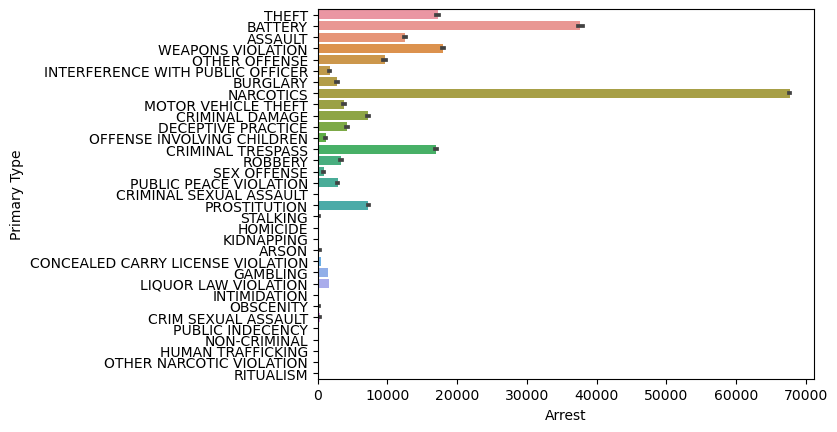

In [12]:
sns.barplot(x='Arrest',y='Primary Type',data=df,estimator=np.sum)

In [13]:
df['Primary Type'] = df['Primary Type'].replace('HOMICIDE', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('RITUALISM', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('KIDNAPPING', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('INTIMIDATION', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('HUMAN TRAFFICKING', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('OTHER NARCOTIC VIOLATION', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('STALKING', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('PUBLIC INDECENCY', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('CRIM SEXUAL ASSAULT', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('NON-CRIMINAL', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('OBSCENITY', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('CONCEALED CARRY LICENSE VIOLATION', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('STALKING', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('CRIMINAL SEXUAL ASSAULT', 'OTHERS')
df['Primary Type'] = df['Primary Type'].replace('ARSON', 'OTHERS')

<AxesSubplot:xlabel='Arrest', ylabel='Primary Type'>

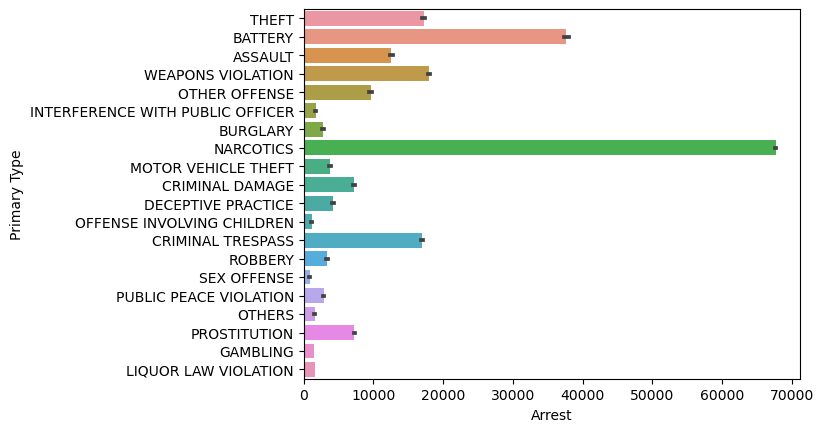

In [14]:
sns.barplot(x='Arrest',y='Primary Type',data=df,estimator=np.sum)

In [14]:
data=df
encoder.fit(data['Primary Type'])
data['Primary Type'] = encoder.transform(data['Primary Type'])

In [15]:
df_matrix = data.corr()
print(df_matrix)

                         Month       Day      Hour     Block      IUCR  \
Month                 1.000000  0.000714 -0.001269 -0.001443 -0.027198   
Day                   0.000714  1.000000 -0.007931 -0.003501 -0.010493   
Hour                 -0.001269 -0.007931  1.000000  0.009623  0.051578   
Block                -0.001443 -0.003501  0.009623  1.000000  0.011071   
IUCR                 -0.027198 -0.010493  0.051578  0.011071  1.000000   
Primary Type          0.005086 -0.003927  0.016760 -0.072147  0.191968   
Description          -0.009582  0.003283 -0.010481 -0.012824  0.295148   
Location Description  0.020702  0.006254  0.003204  0.027619  0.038455   
Arrest               -0.014607 -0.001742  0.010003 -0.039608  0.302460   
Domestic             -0.017746 -0.001444 -0.004713  0.083657 -0.073046   
Beat                  0.007725 -0.001447  0.002936 -0.115233  0.013585   
District              0.005115 -0.002370  0.002328 -0.107118  0.011295   
Ward                  0.002975 -0.0005

<AxesSubplot:>

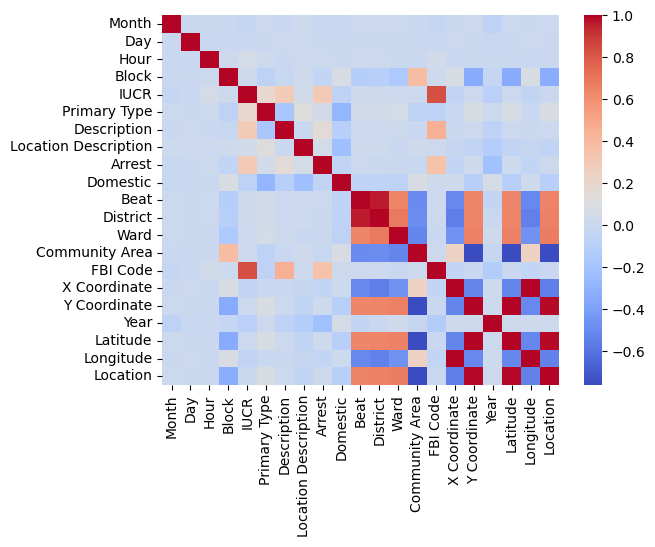

In [16]:
sns.heatmap(df_matrix, cmap='coolwarm', annot=False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = data[['IUCR', 'Domestic', 'Description']]
y = data['Primary Type']

# Standardize the features (optional but often recommended for linear regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Discretize 'Primary Type' into categories
threshold = 1  # You can adjust this threshold based on your problem
y_pred_class = (y_pred > threshold).astype(int)

# Convert 'Primary Type' into binary categories for comparison
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f'Accuracy: {accuracy}')

Mean Squared Error: 38.75064056292726
R-squared: 0.18621974315598122
Accuracy: 0.741453472091518


X_train shape: (871346, 3)
X_test shape: (217837, 3)
y_train shape: (871346,)
y_test shape: (217837,)


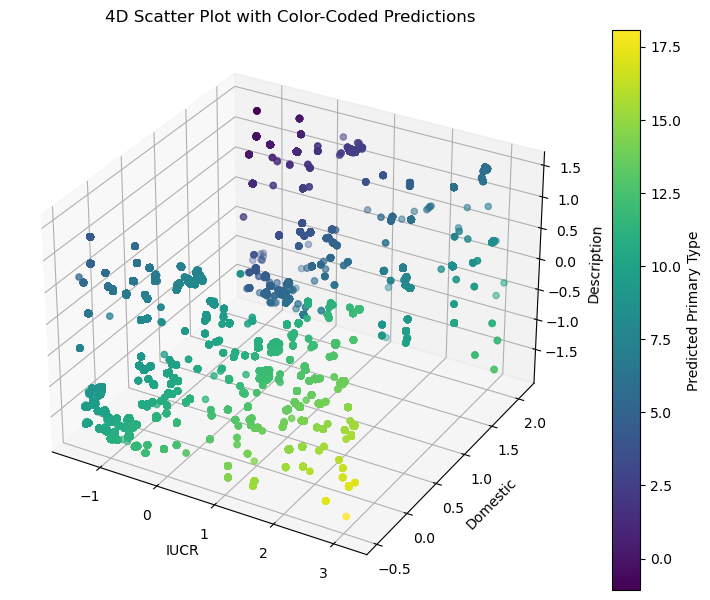

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Create a 4D scatter plot with color representing the predicted values
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(222, projection='3d')

# scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_pred, cmap='viridis', marker='.')
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis', marker='o')
# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Primary Type')

ax.set_xlabel('IUCR')
ax.set_ylabel('Domestic')
ax.set_zlabel('Description')
ax.set_title('4D Scatter Plot with Color-Coded Predictions')

plt.show()

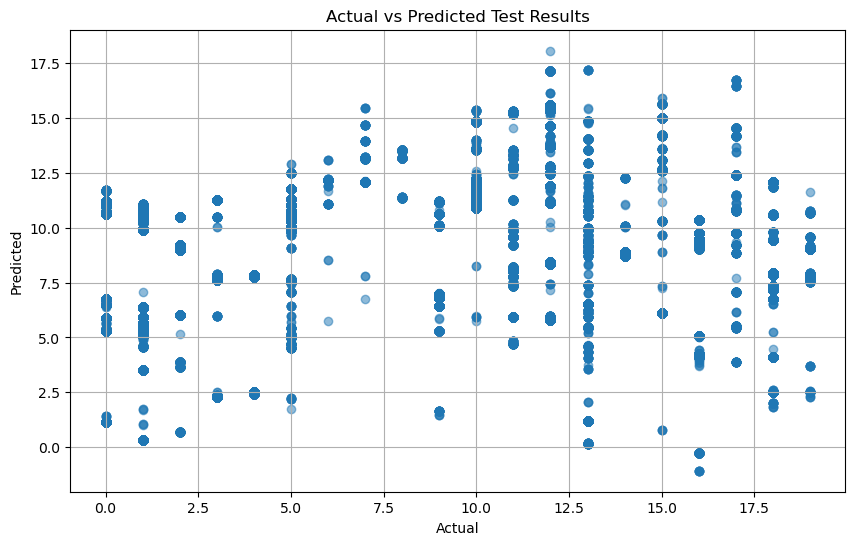

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = df[['IUCR', 'Domestic', 'Description']]
y = df['Primary Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
classification_rep = classification_report(y_test, y_pred_logreg)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

Accuracy: 0.7757994011823334
Confusion Matrix:
[[ 62143   7196      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0   6043      0]
 [   648 179882      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [   665      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0  42355      0]
 [     0      0      0 115837      0   4625      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [     0      0      0  24943      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [     0      0      0   5773      0  45206      0      0      0      0
       0      0      0      0      0      0      0      0    123      0]
 [     0      0      0      0      0      0      0      0      0      0
    1261   

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = df[['IUCR', 'Domestic', 'Description']]
y = df['Primary Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=42)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
class_rep_dt = classification_report(y_test, y_pred_dt)

# Print results
print(f'Accuracy (Decision Tree): {accuracy_dt}')
print('Classification Report (Decision Tree):')
print(class_rep_dt)

conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy (Decision Tree): 1.0
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16730
           1       1.00      1.00      1.00     39954
           2       1.00      1.00      1.00      9688
           3       1.00      1.00      1.00     26745
           4       1.00      1.00      1.00      5566
           5       1.00      1.00      1.00     11436
           6       1.00      1.00      1.00       283
           7       1.00      1.00      1.00       368
           8       1.00      1.00      1.00       336
           9       1.00      1.00      1.00     14264
          10       1.00      1.00      1.00     13823
          11       1.00      1.00      1.00      1620
          12       1.00      1.00      1.00     13483
          13       1.00      1.00      1.00      2208
          14       1.00      1.00      1.00      1478
          15       1.00      1.00      1.00      1054
          16

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = df[['IUCR', 'Domestic', 'Description']]
y = df['Primary Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.996, random_state=42)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_rep_rf = classification_report(y_test, y_pred_rf)

# Print results
print(f'Accuracy (Random Forest): {accuracy_rf}')
print('Classification Report (Random Forest):')
print(class_rep_rf)


Accuracy (Random Forest): 0.9941456103139026
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83474
           1       1.00      1.00      1.00    199805
           2       1.00      0.99      0.99     47607
           3       1.00      1.00      1.00    133394
           4       1.00      1.00      1.00     27521
           5       1.00      0.99      1.00     56508
           6       0.93      0.98      0.95      1428
           7       0.81      0.93      0.87      1903
           8       1.00      1.00      1.00      1612
           9       1.00      1.00      1.00     70649
          10       1.00      1.00      1.00     68274
          11       0.98      0.86      0.91      7981
          12       0.99      0.99      0.99     67305
          13       0.98      0.82      0.89     10935
          14       0.85      1.00      0.92      7299
          15       0.97      0.90      0.93      52

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = df[['IUCR', 'Domestic', 'Description']]
y = df['Primary Type']

# Convert the categorical target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers (customize as needed)
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=len(le.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_nn = model.predict_classes(X_test_scaled)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
class_rep_nn = classification_report(y_test, y_pred_nn, target_names=le.classes_)

# Print results
print(f'Accuracy (Neural Network): {accuracy_nn}')
print('Classification Report (Neural Network):')
print(class_rep_nn)





Epoch 1/10


21784/21784 [==============================] - 24s 1ms/step - loss: 0.1818 - accuracy: 0.9511 - val_loss: 0.0783 - val_accuracy: 0.9818
Epoch 2/10
21784/21784 [==============================] - 23s 1ms/step - loss: 0.0553 - accuracy: 0.9871 - val_loss: 0.0424 - val_accuracy: 0.9902
Epoch 3/10
21784/21784 [==============================] - 23s 1ms/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.0380 - val_accuracy: 0.9898
Epoch 4/10
21784/21784 [==============================] - 23s 1ms/step - loss: 0.0343 - accuracy: 0.9911 - val_loss: 0.0341 - val_accuracy: 0.9920
Epoch 5/10
21784/21784 [==============================] - 23s 1ms/step - loss: 0.0290 - accuracy: 0.9926 - val_loss: 0.0273 - val_accuracy: 0.9938
Epoch 6/10
21784/21784 [==============================] - 23s 1ms/step - loss: 0.0250 - accuracy: 0.9938 - val_loss: 0.0216 - val_accuracy: 0.9945
Epoch 7/10
21784/21784 [==============================] - 25s 1ms/step - loss: 0.0219 - accuracy: 0.9946 - val_lo

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_nn)

# Evaluate the model
accuracy_nn = accuracy_score(y_test_labels, y_pred_labels)
class_rep_nn = classification_report(y_test_labels, y_pred_labels)

# Print results
print(f'Accuracy (Neural Network): {accuracy_nn}')
print('Classification Report (Neural Network):')
print(class_rep_nn)

In [ ]:
df.info()

In [ ]:
y_pred_probs = model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_probs, axis=1)

# # Evaluate the model
# accuracy_nn = accuracy_score(y_test, y_pred_nn)
# class_rep_nn = classification_report(y_test, y_pred_nn, target_names=le.classes_)

# Print results
print(f'Accuracy (Neural Network): {accuracy_nn}')
# print('Classification Report (Neural Network):')
# print(class_rep_nn)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X' contains your features and 'y' contains your target variable 'Primary Type'
X = df[['IUCR', 'Domestic', 'Description']]
y = df['Primary Type']

# Convert the categorical target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test_scaled)

# Convert y_test back to original class labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_nb)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
class_rep_nb = classification_report(y_test_labels, y_pred_labels, target_names=le.classes_, output_dict=True)

class_rep_df = pd.DataFrame(class_rep_nb).transpose()

# Print results
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print('Classification Report (Naive Bayes):')
print(class_rep_df)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (Naive Bayes): 0.8975013427470999
Classification Report (Naive Bayes):
              precision    recall  f1-score        support
0              0.880760  0.952779  0.915355   16730.000000
1              0.957280  1.000000  0.978174   39954.000000
2              0.997079  0.916185  0.954922    9688.000000
3              0.995662  0.935502  0.964645   26745.000000
4              0.894987  0.981495  0.936247    5566.000000
5              0.958574  0.870059  0.912175   11436.000000
6              0.833837  0.975265  0.899023     283.000000
7              1.000000  0.864130  0.927114     368.000000
8              1.000000  0.791667  0.883721     336.000000
9              0.698531  0.983104  0.816739   14264.000000
10             0.718960  0.998264  0.835898   13823.000000
11             0.990107  0.803086  0.886844    1620.000000
12             0.904964  0.631388  0.743818   13483.000000
13             0.221336  0.238678  0.229680    2208.000000
14             0.988340  0.974966  

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
